<a href="https://colab.research.google.com/github/Fatima8024/CODES/blob/main/Finetuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q google-generativeai

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

In [ ]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-7824
tunedModels/generate-num-9955
tunedModels/generate-num-8250
tunedModels/generate-num-8666


In [ ]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [ ]:
import random

name = f'generate-num-{random.randint(0,10000)}'   ## Fine tune a model to generate squares
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '2',
             'output': '4',
        },{
             'text_input': '3',
             'output': '9',
        },{
             'text_input': '-3',
             'output': '-9',
        },{
             'text_input': 'twenty two',
             'output': 'four hundred eighty four',
        },{
             'text_input': 'two hundred',
             'output': 'four hundred',
        },{
             'text_input': 'ninety nine',
             'output': 'nine thousand eight hundred and one',
        },{
             'text_input': '8',
             'output': '64',
        },{
             'text_input': '-98',
             'output': '9604',
        },{
             'text_input': '1,000',
             'output': '1,000000',
        },{
             'text_input': '10,100,000',
             'output': '102,010,000,000,000',
        },{
             'text_input': 'thirteen',
             'output': 'one hundred and sixty nine',
        },{
             'text_input': 'eighty',
             'output': 'six thousand four hundred',
        },{
             'text_input': 'one',
             'output': 'one',
        },{
             'text_input': 'three',
             'output': 'nine',
        },{
             'text_input': 'seven',
             'output': 'forty nine',
        }
    ],
    id = name,
    epoch_count = 100,
    batch_size=4,
    learning_rate=0.001,
)

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-4797',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 20, 3, 16, 55, 337693, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 20, 3, 16, 55, 337693, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 20, 3, 16, 56, 479599, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                 

In [ ]:
model.state

<State.CREATING: 1>

In [ ]:
operation.metadata

tuned_model: "tunedModels/generate-num-4797"
total_steps: 375

<Axes: xlabel='epoch', ylabel='mean_loss'>

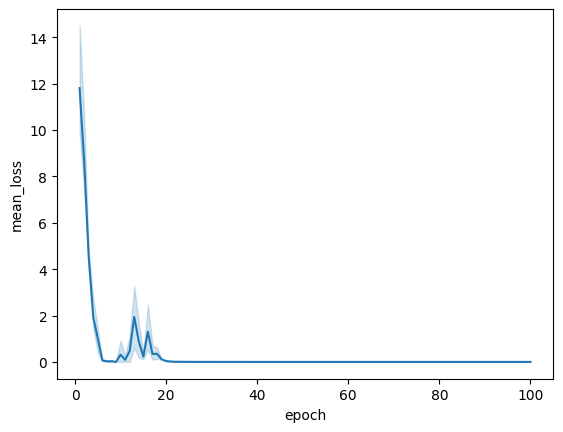

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [ ]:
result = model.generate_content('55')
result.text